In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings

In [2]:
df_machine = pd.read_pickle('df_machine.pkl')

In [44]:
def elbow_method(df):
    """
    This function calculate the sum of squared distances for each k value and plots graph
    :arg:
        df: dataframe with all the data.
    :returns:
        The function does not have a return. It saves the plot inside the plots folder.
    """
    k_values = list(range(2, 19))
    sse = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        
        #Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=sse, mode='lines+markers'))
    fig.update_layout(
        title='Elbow Method',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Sum of Squared Distances'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(df):
    # Perform K-Means clustering with different values of k
    k_values = range(1, 11)
    inertias = []
    
    for k in k_values:
        km = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly to avoid warning
        km.fit(df)
        inertias.append(km.inertia_)
    
    # Plotting the elbow curve
    plt.plot(k_values, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

In [5]:
def silhouette_plot(df):
    """
    Generate an interactive line chart of Silhouette Coefficient vs. Number of Clusters using Plotly.

    :Args:
    df: (pandas DataFrame): The input data.
    """
    k_values = list(range(2, 19))
    silhouette_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

        # Calculate the Silhouette Coefficient for the clustering result
        silhouette_coefficient = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_coefficient)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=k_values, y=silhouette_scores, mode='lines+markers'))
    fig.update_layout(
        title='Silhouette Coefficient vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Silhouette Coefficient'),
        showlegend=False,
        template='plotly_white'
    )

    # Display the chart
    fig.show()

In [46]:
elbow_method(df_machine)

In [6]:
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Call silhouette_plot with df_machine
silhouette_plot(df_machine)

In [22]:
# Initializing
pca = PCA(n_components=None) #Number of components to keep. if n_components is not set all components are kept

pca.fit(iris.drop(columns="species"))

# Calculating variance
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

# Plotting
plt.bar(range(1, 5), exp_var, align='center',label='Individual explained variance') #bars
plt.step(range(1, 5), cum_exp_var, where='mid', label='Cumulative explained variance', color='red') #line

# Axis
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

In [23]:
apply_pca(df_machine,7)

array([[-2.17077754e+01, -1.24180872e+01,  1.13009633e+01, ...,
         1.51903456e+00,  2.25279803e+00, -1.11743932e+00],
       [-1.66235786e+01,  5.48153361e+01,  1.02606455e+01, ...,
         2.17065804e+00,  1.21873002e+00, -4.85887185e-01],
       [-2.17126519e+01, -1.23351826e+01,  1.26125383e+01, ...,
        -3.95195921e-01, -9.11435386e-01, -6.51596726e-01],
       ...,
       [ 1.12796172e+01, -6.39594997e+00, -8.95258829e+00, ...,
        -1.98556149e-01, -3.33253659e-02, -9.30566940e-02],
       [ 3.93197706e+01, -1.76594676e+01, -5.67073721e+00, ...,
         6.81407907e-01, -4.37500375e-01, -2.86397461e-01],
       [ 2.72002390e+01, -1.66533662e+01, -4.19487131e+00, ...,
        -1.20268062e-01, -1.01389962e+00, -1.92004369e-01]])

In [7]:
def davies_boulding_plot(df):
    """
    Generate an interactive line chart of Davies-Bouldin Index vs. Number of Clusters using Plotly.
    :Args:
    df (pandas DataFrame): The input data.
    """
    
    k_values = list(range(2, 19))
    davies_bouldin_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

#Calculate the Davies-Bouldin Index for the clustering result
        davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
        davies_bouldin_scores.append(davies_bouldin_index)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=davies_bouldin_scores, mode='lines+markers'))
    fig.update_layout(
        title='Davies-Bouldin Index vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (K)'),
        yaxis=dict(title='Davies-Bouldin Index'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [8]:
davies_boulding_plot(df_machine)

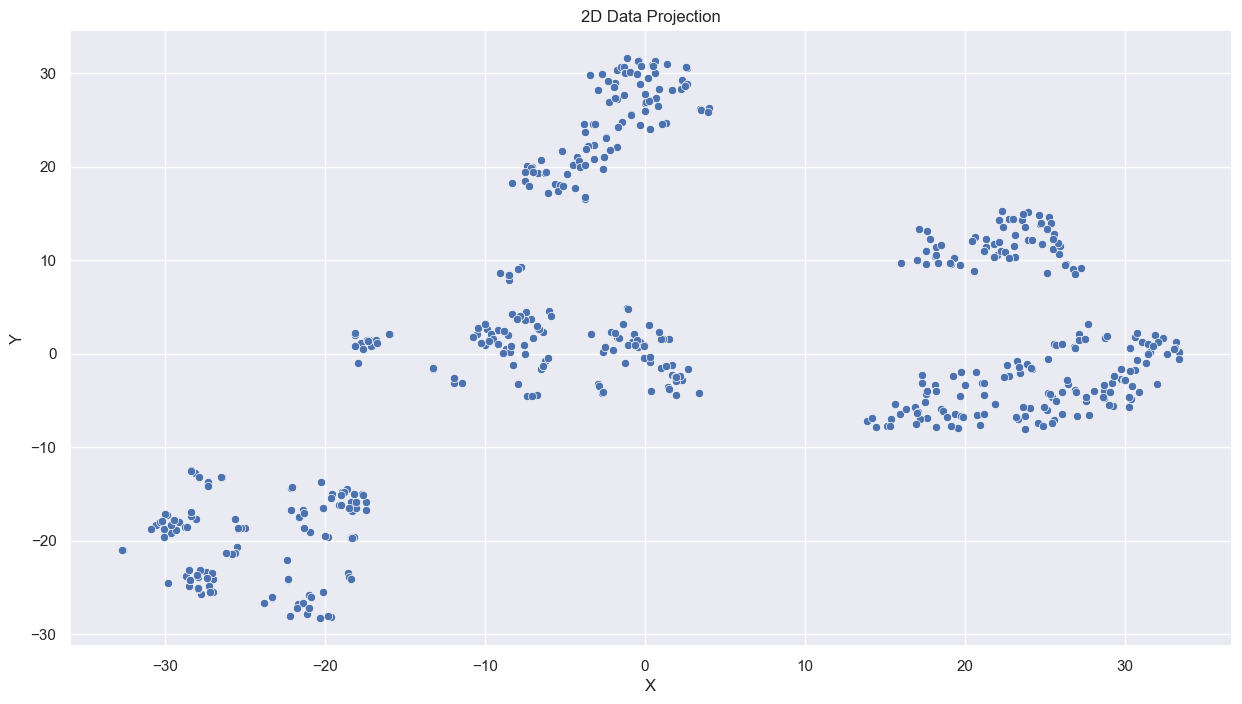

In [9]:
#Instantiating TSNE
tsne = TSNE(n_components=2, random_state=42)


tsne_df = pd.DataFrame(tsne.fit_transform(df_machine), columns = ['X', 'Y'] )

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x= 'X', y= 'Y',data= tsne_df).set(title= '2D Data Projection');

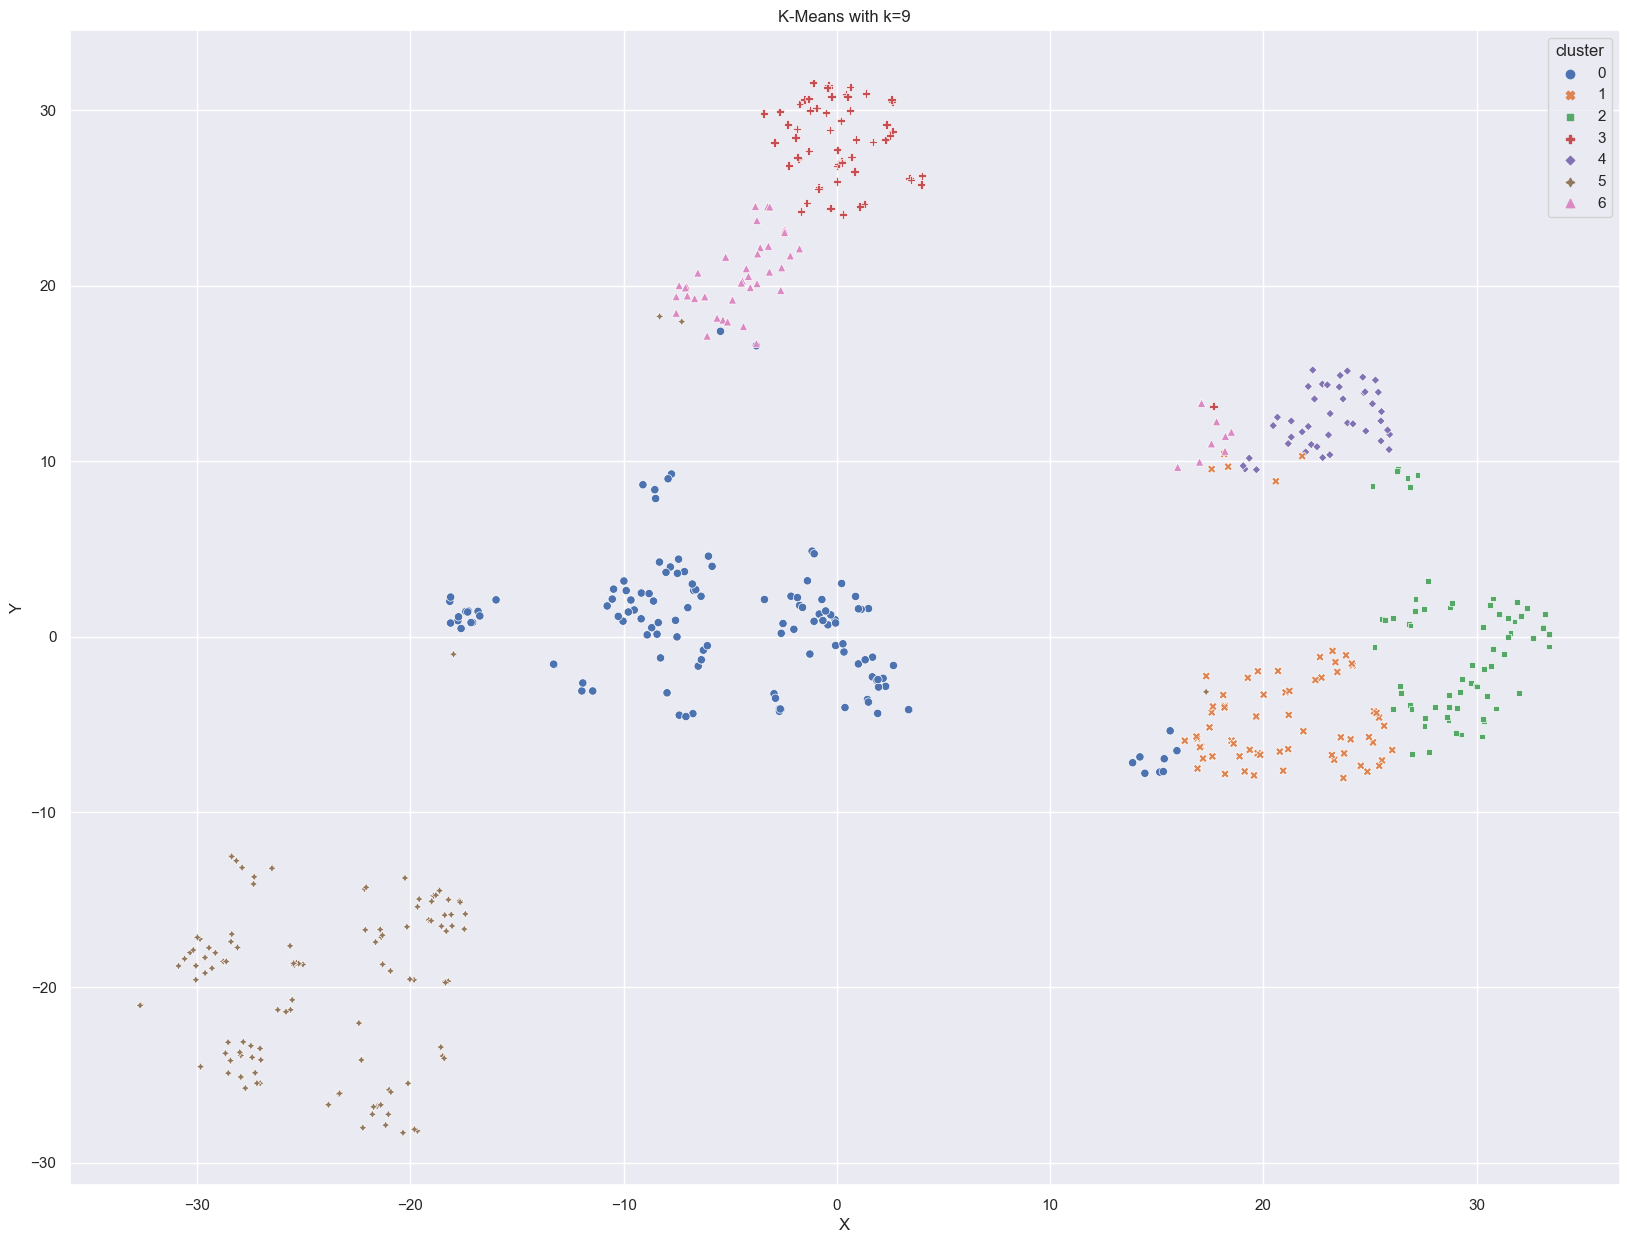

In [25]:
km = KMeans(n_clusters = 7).fit(df_machine)
tsne_df['cluster'] = pd.Categorical(km.labels_)

sns.set(rc = {'figure.figsize':(20,15)})
sns.scatterplot(x='X', y='Y', hue='cluster', style='cluster', data= tsne_df).set(title= 'K-Means with k=9');

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Ejecutar el algoritmo K-Means con n_init explícito
kmeans = KMeans(n_clusters=7, n_init=10).fit(df_machine)

# Agregar las etiquetas de clúster al DataFrame tsne_df
tsne_df['cluster'] = pd.Categorical(kmeans.labels_)

# Crear un diccionario para almacenar los DataFrames de cada clúster
cluster_dataframes = {}

# Iterar sobre cada clúster y crear el DataFrame correspondiente
for cluster in range(9):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_dataframes[cluster] = df_machine.iloc[cluster_indices]

# Acceder a un DataFrame específico de un clúster
cluster_6_df = cluster_dataframes[6]

In [27]:
cluster_0_df

,HORAS DE CONTRATO,Categoría,Número de hijos,Sexo,Supervisora/Coordinador,Sección,IT/AT,Horas contratadas,TIPO DE BAJA,Evaluación,Supervisor/a,CATEGORIA,SECCIÓN,TIENDA/SECCION INICIAL,SECCIÓN2,TIENDA/SECCION FINAL2,QUIEN CAUSO BAJA?,FECHA BAJA CATEGORY,Nº DE DIAS CATEGORY
ID,,,,,,,,,,,,,,,,,,,
4656M,1,5,2,2,16,1,2.0,1.0,2.0,1.0,6.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
0010X,1,5,2,2,16,1,1.0,1.0,2.0,1.0,6.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
0606X,1,5,2,2,16,1,3.0,1.0,1.0,1.0,6.0,7.0,3.0,73.0,1.0,1.0,1.0,2.0,0.0
7666X,1,5,2,2,16,1,1.0,1.0,2.0,1.0,1.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
8926V,1,5,2,2,16,1,1.0,1.0,2.0,3.0,5.0,7.0,3.0,91.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588D,1,3,7,1,23,1,1.0,1.0,3.0,1.0,9.0,1.0,3.0,88.0,1.0,1.0,1.0,2.0,0.0
7254D,2,3,7,1,30,1,2.0,2.0,1.0,1.0,12.0,1.0,3.0,74.0,1.0,1.0,1.0,2.0,0.0
8565M,2,3,7,1,30,1,1.0,1.0,2.0,1.0,12.0,1.0,3.0,73.0,1.0,1.0,1.0,2.0,0.0


In [28]:
value_counts_dict = {}
for column in cluster_0_df.columns:
    value_counts_dict[column] = cluster_0_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     68
1     67
6      5
11     2
15     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    121
5     17
4      4
2      1
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
2     67
7     47
3      8
9      8
8      7
1      2
10     2
6      1
5      1
Name: count, dtype: int64

Column: Sexo
Sexo
1    123
2     20
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
19    48
21    36
30    12
23    11
17     9
18     8
16     6
29     4
26     3
24     2
22     1
25     1
31     1
20     1
Name: count, dtype: int64

Column: Sección
Sección
1    142
2      1
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    126
2.0      9
3.0      8
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
1.0    99
2.0    40
3.0     4
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    96
3.0    26
1.0    20
4.0     1
Name: count, dtype: int64

Column: Evaluación
Eva

In [30]:
cluster_1_df

,HORAS DE CONTRATO,Categoría,Número de hijos,Sexo,Supervisora/Coordinador,Sección,IT/AT,Horas contratadas,TIPO DE BAJA,Evaluación,Supervisor/a,CATEGORIA,SECCIÓN,TIENDA/SECCION INICIAL,SECCIÓN2,TIENDA/SECCION FINAL2,QUIEN CAUSO BAJA?,FECHA BAJA CATEGORY,Nº DE DIAS CATEGORY
ID,,,,,,,,,,,,,,,,,,,
0302A,1,3,2,1,2,1,1.0,1.0,1.0,4.0,4.0,2.0,2.0,4.0,3.0,15.0,2.0,1.0,5.0
3181P,2,3,7,1,2,1,1.0,1.0,2.0,1.0,14.0,1.0,3.0,23.0,1.0,1.0,1.0,2.0,0.0
1049R,2,3,9,1,2,1,1.0,1.0,2.0,1.0,9.0,1.0,3.0,24.0,1.0,1.0,1.0,2.0,0.0
6565V,6,3,7,1,19,1,1.0,1.0,2.0,1.0,17.0,1.0,3.0,10.0,1.0,1.0,1.0,2.0,0.0
6739A,2,3,7,1,21,1,2.0,2.0,2.0,4.0,3.0,1.0,3.0,30.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548T,6,3,7,1,30,1,1.0,1.0,2.0,1.0,1.0,1.0,3.0,16.0,1.0,1.0,1.0,2.0,0.0
6485K,3,3,7,1,11,1,1.0,7.0,2.0,1.0,2.0,1.0,3.0,21.0,1.0,1.0,1.0,2.0,0.0
6010V,6,3,7,1,30,1,1.0,3.0,2.0,11.0,17.0,1.0,3.0,29.0,1.0,1.0,1.0,2.0,0.0


In [31]:
value_counts_dict = {}
for column in cluster_1_df.columns:
    value_counts_dict[column] = cluster_1_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     66
6      8
1      5
3      2
11     1
16     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    83
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
7     63
9     12
8      4
10     2
2      1
11     1
Name: count, dtype: int64

Column: Sexo
Sexo
1    81
2     2
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
21    17
30    11
24    10
29    10
26    10
6      8
11     7
2      4
23     3
19     2
25     1
Name: count, dtype: int64

Column: Sección
Sección
1    83
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    77
2.0     6
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
2.0     53
1.0     24
3.0      3
5.0      1
10.0     1
7.0      1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    65
1.0    12
3.0     4
4.0     2
Name: count, dtype: int64

Column: Evaluación
Evaluación
1.0     56
3.0     14
2.0      4
4.0      3
11.0     2

In [37]:
value_counts_dict = {}
for column in cluster_2_df.columns:
    value_counts_dict[column] = cluster_2_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     56
6      8
1      4
3      2
11     1
16     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    72
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
7     54
9     11
8      4
10     2
2      1
Name: count, dtype: int64

Column: Sexo
Sexo
1    71
2     1
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
21    13
30    11
24    10
26    10
29     9
6      5
11     5
2      4
19     2
23     2
25     1
Name: count, dtype: int64

Column: Sección
Sección
1    72
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    67
2.0     5
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
2.0     46
1.0     20
3.0      3
5.0      1
10.0     1
7.0      1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    59
1.0     8
3.0     3
4.0     2
Name: count, dtype: int64

Column: Evaluación
Evaluación
1.0     48
3.0     12
2.0      4
4.0      2
11.0     2
10.0    

In [38]:
value_counts_dict = {}
for column in cluster_3_df.columns:
    value_counts_dict[column] = cluster_3_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     34
1      5
6      2
11     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    39
4     3
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
7     35
8      3
9      2
2      1
10     1
Name: count, dtype: int64

Column: Sexo
Sexo
1    38
2     4
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
11    17
6      5
21     4
29     4
23     4
25     3
19     1
16     1
31     1
30     1
26     1
Name: count, dtype: int64

Column: Sección
Sección
1    42
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    40
2.0     2
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
2.0     28
1.0     11
6.0      1
3.0      1
10.0     1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    34
3.0     5
1.0     2
4.0     1
Name: count, dtype: int64

Column: Evaluación
Evaluación
1.0     29
3.0      8
10.0     3
2.0      1
6.0      1
Name: count, dtype: int64

Co

In [39]:
value_counts_dict = {}
for column in cluster_4_df.columns:
    value_counts_dict[column] = cluster_4_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     59
6      8
1      4
3      2
11     1
16     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    75
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
7     56
9     12
8      4
10     2
2      1
Name: count, dtype: int64

Column: Sexo
Sexo
1    74
2     1
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
21    13
30    11
24    10
26    10
29     9
11     7
6      6
2      4
19     2
23     2
25     1
Name: count, dtype: int64

Column: Sección
Sección
1    75
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    70
2.0     5
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
2.0     47
1.0     22
3.0      3
5.0      1
10.0     1
7.0      1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    60
1.0     9
3.0     4
4.0     2
Name: count, dtype: int64

Column: Evaluación
Evaluación
1.0     50
3.0     13
2.0      4
4.0      2
11.0     2
10.0    

In [40]:
value_counts_dict = {}
for column in cluster_5_df.columns:
    value_counts_dict[column] = cluster_5_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     54
1      5
6      4
3      2
11     1
Name: count, dtype: int64

Column: Categoría
Categoría
3    63
4     3
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
7     56
8      6
9      2
2      1
11     1
Name: count, dtype: int64

Column: Sexo
Sexo
1    60
2     6
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
21    13
11    10
23     8
6      6
29     6
26     6
24     4
2      3
30     3
19     2
17     2
10     1
18     1
25     1
Name: count, dtype: int64

Column: Sección
Sección
1    65
3     1
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    60
2.0     6
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
2.0    38
1.0    21
3.0     3
7.0     2
6.0     1
9.0     1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    53
3.0     7
1.0     5
4.0     1
Name: count, dtype: int64

Column: Evaluación
Evaluación
1.0     49
3.0     10
6.0      2
4.

In [41]:
value_counts_dict = {}
for column in cluster_6_df.columns:
    value_counts_dict[column] = cluster_6_df[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

Column: HORAS DE CONTRATO
HORAS DE CONTRATO
2     30
1     26
8      1
11     1
3      1
6      1
Name: count, dtype: int64

Column: Categoría
Categoría
3     49
5      6
4      3
1      1
12     1
Name: count, dtype: int64

Column: Número de hijos
Número de hijos
2    28
7    21
3     3
1     3
9     3
8     2
Name: count, dtype: int64

Column: Sexo
Sexo
1    50
2    10
Name: count, dtype: int64

Column: Supervisora/Coordinador
Supervisora/Coordinador
2     12
6     10
11     9
17     7
19     7
25     4
16     2
18     2
21     2
23     2
15     1
26     1
29     1
Name: count, dtype: int64

Column: Sección
Sección
1    60
Name: count, dtype: int64

Column: IT/AT
IT/AT
1.0    55
2.0     4
3.0     1
Name: count, dtype: int64

Column: Horas contratadas
Horas contratadas
1.0    35
2.0    21
4.0     1
6.0     1
7.0     1
3.0     1
Name: count, dtype: int64

Column: TIPO DE BAJA
TIPO DE BAJA
2.0    41
3.0    12
1.0     6
4.0     1
Name: count, dtype: int64

Column: Evaluación
Evaluación
1